In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from graph_functions import *

# Graph relevant data results

Graph various data results in order to select best graphs to include in paper.

## Treatment 1

In [2]:
w_vars = [1, 2, 3, 4, 5]
v_vars = [1, 2, 3, 4, 5]
costs = [0.01, 0.3, 0.6,0.9,1.2,1.5]

### Plot case when $\sigma_v^2=3$ fixed
By variance level

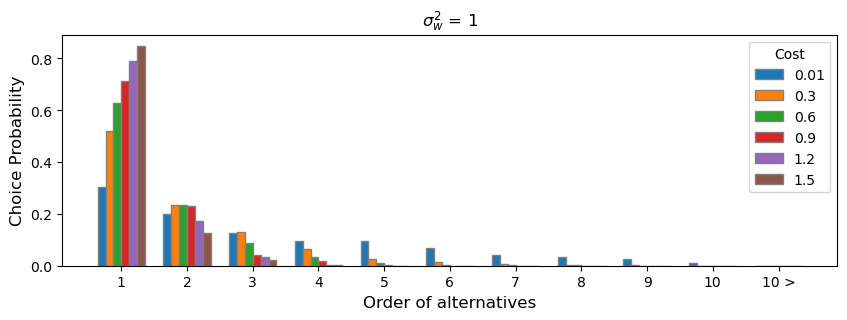

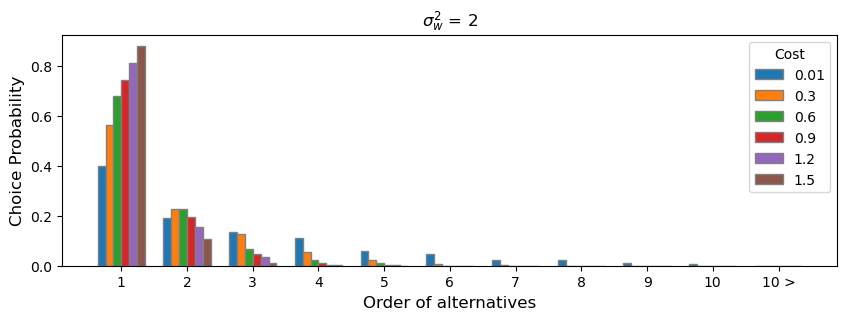

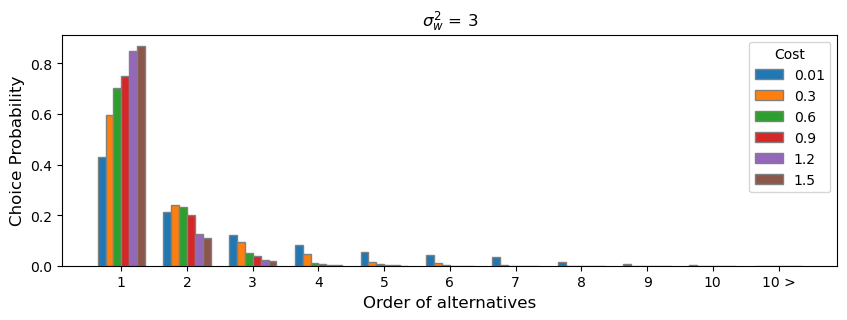

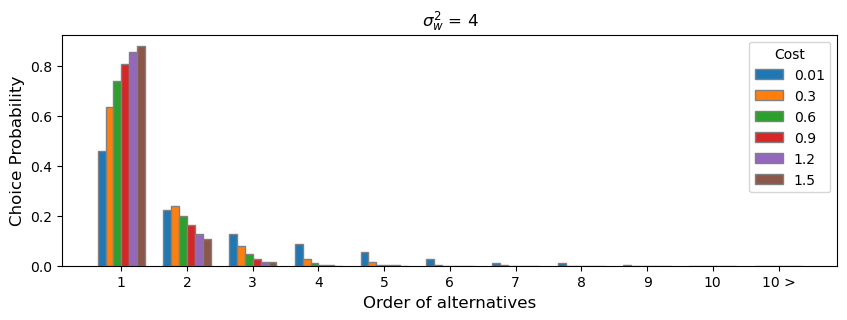

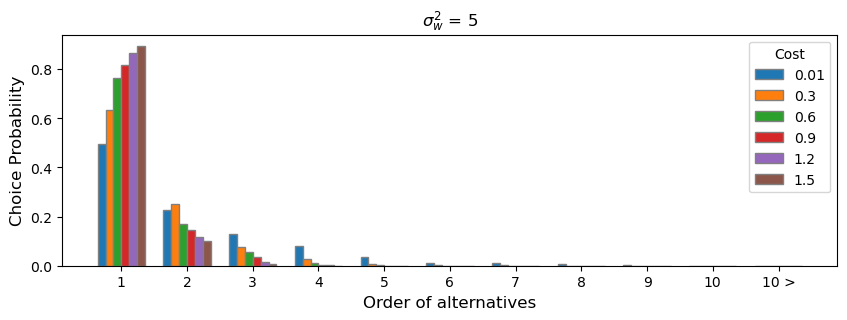

In [3]:
for w_var in w_vars:
    plot_w_var_t1(w_var, costs)

By cost level

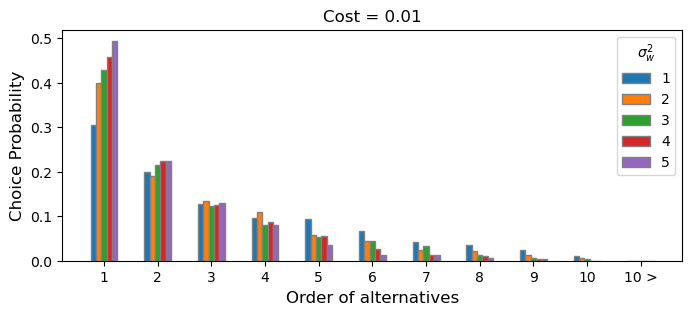

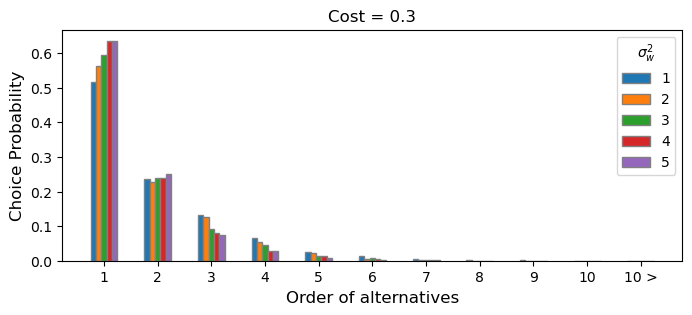

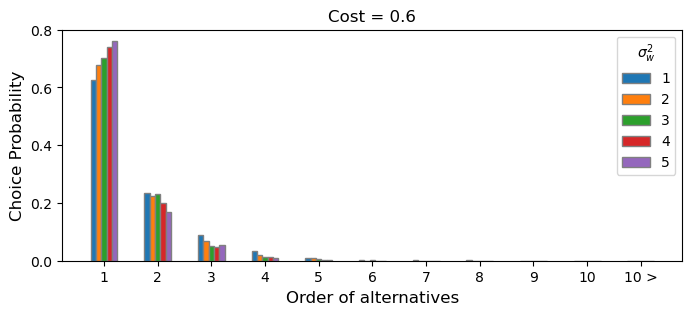

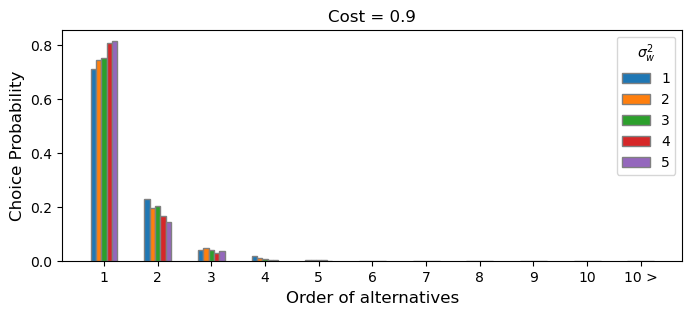

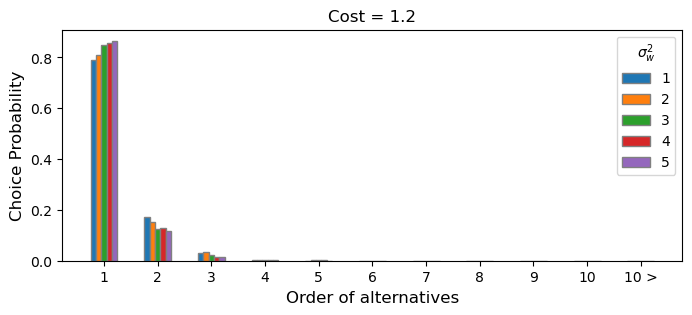

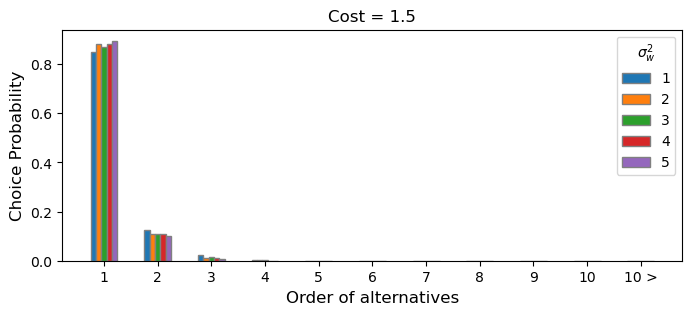

In [4]:
for cost in costs:
    plot_cost_x_t1(cost, w_vars)

### Plot case when $\sigma_w^2=3$ fixed
By variance level

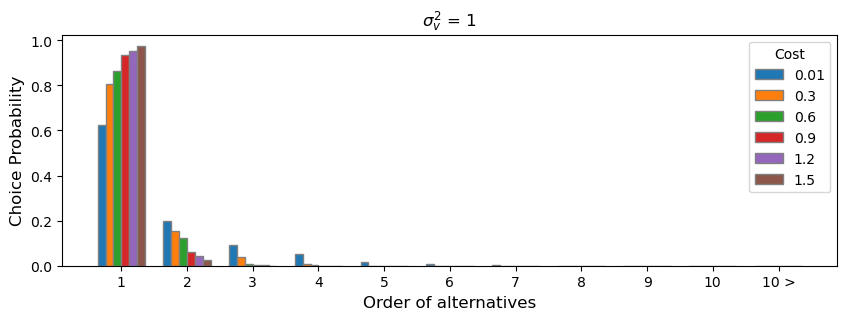

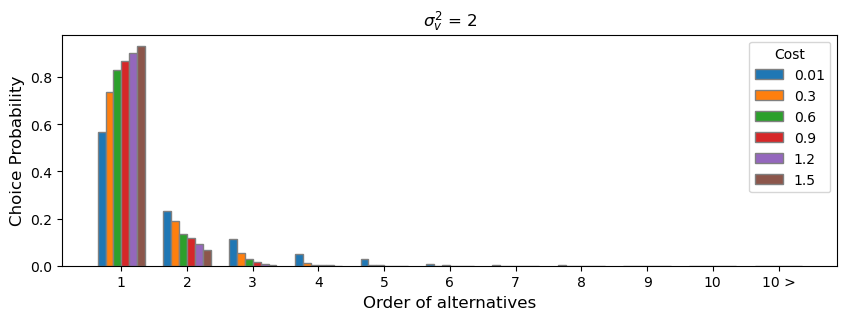

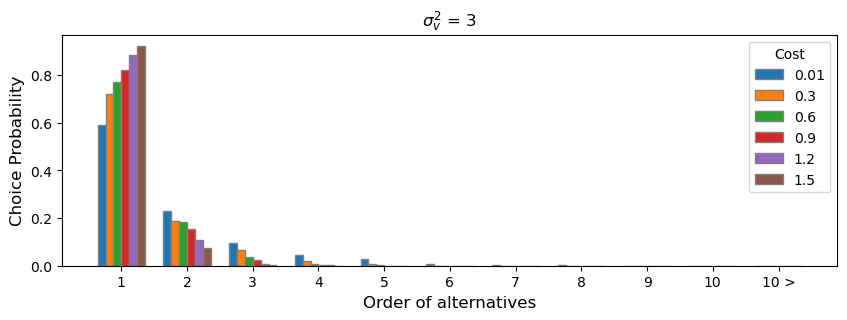

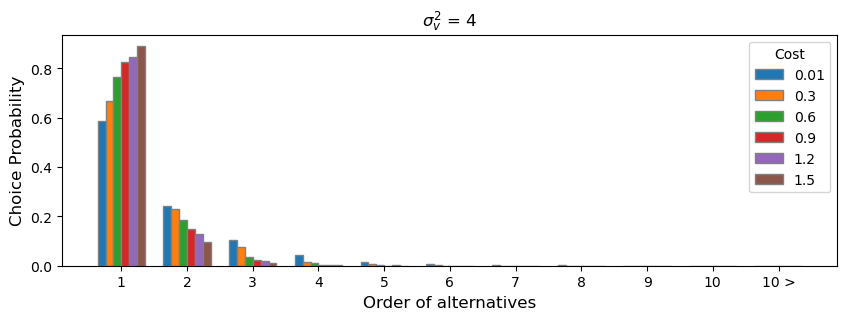

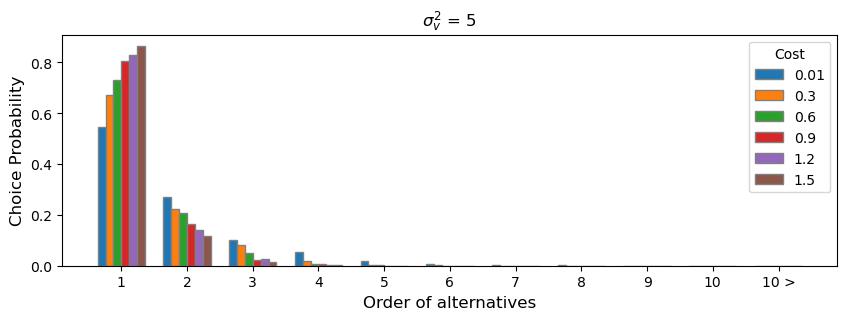

In [5]:
for v_var in v_vars:
    plot_v_var_t1(v_var, costs)

By cost level

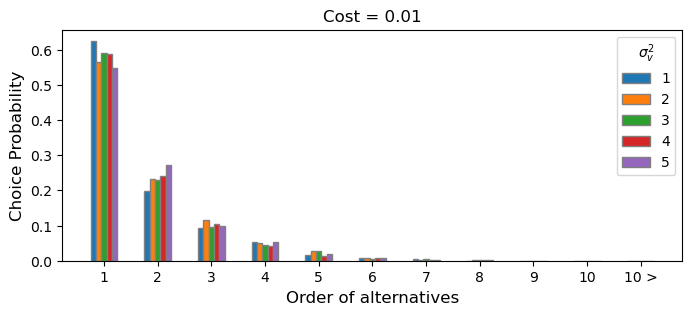

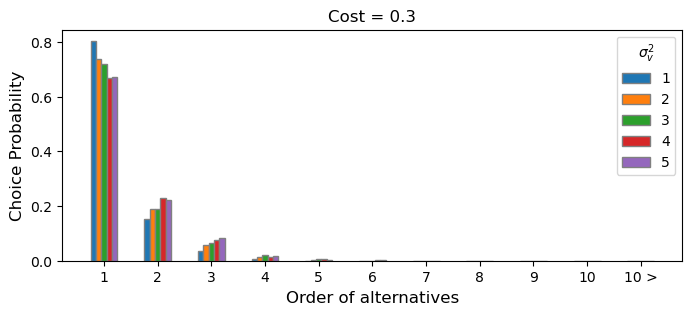

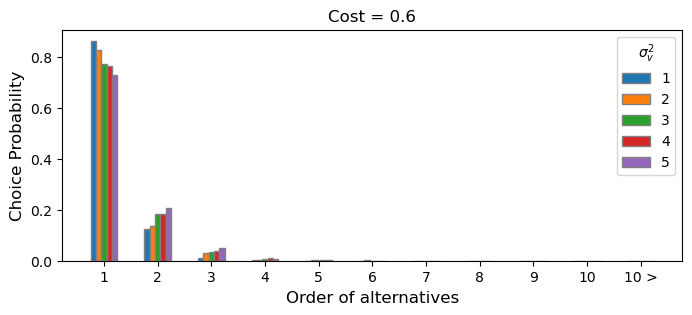

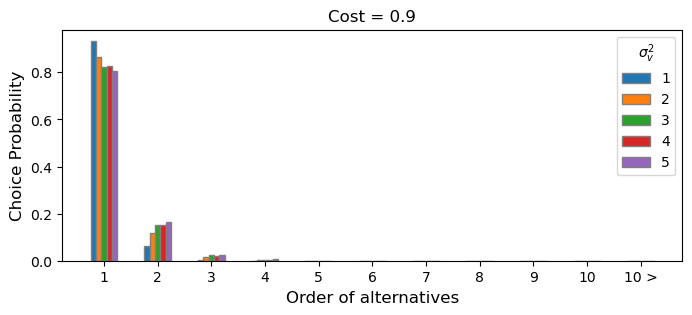

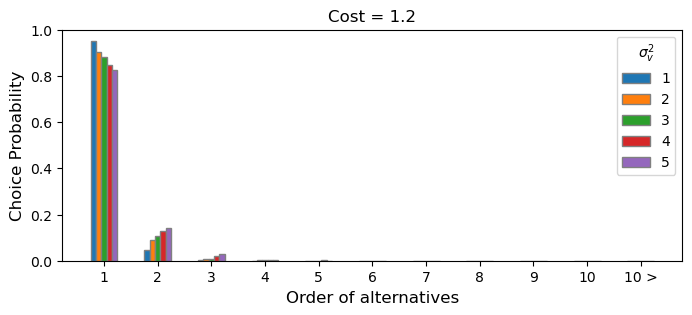

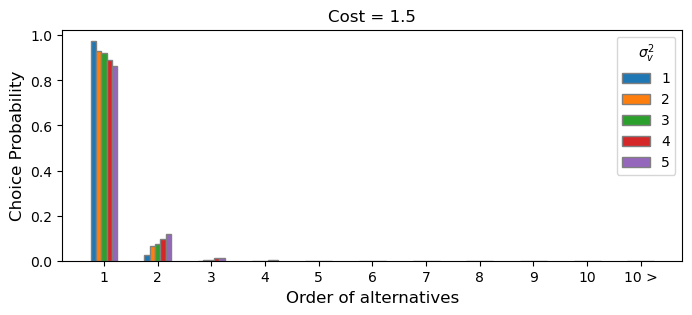

In [6]:
for cost in costs:
    plot_cost_v_t1(cost, v_vars)

## Treatment 2

In [7]:
w_vars = [0.5, 1, 2, 3]
v_vars_ratio = [0.5, 1, 2, 3, 4, 5]
costs = [0.01, 0.3, 0.6,0.9,1.2,1.5]

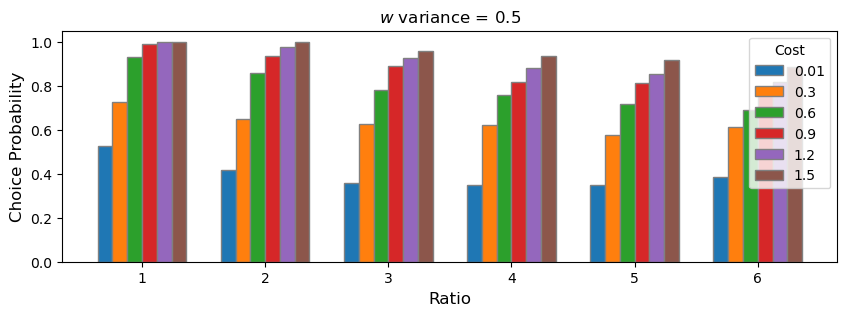

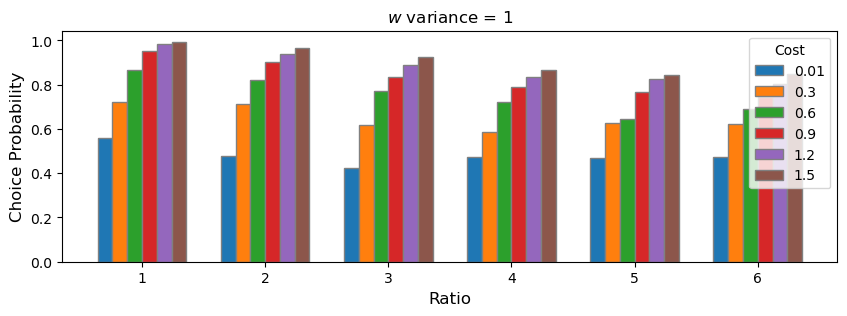

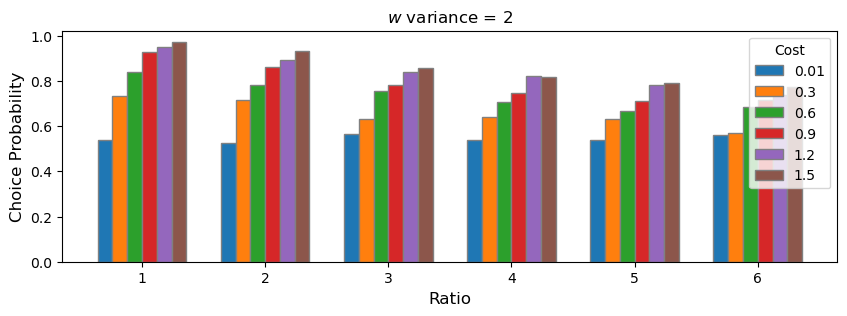

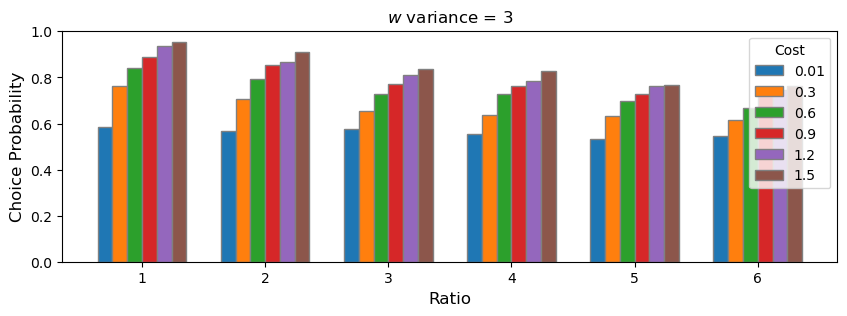

In [8]:
for w_var in w_vars:
    plot_w_var_t2(w_var, costs, v_vars_ratio)

### Plot choice probability of lowest variance for $w$ and $v$

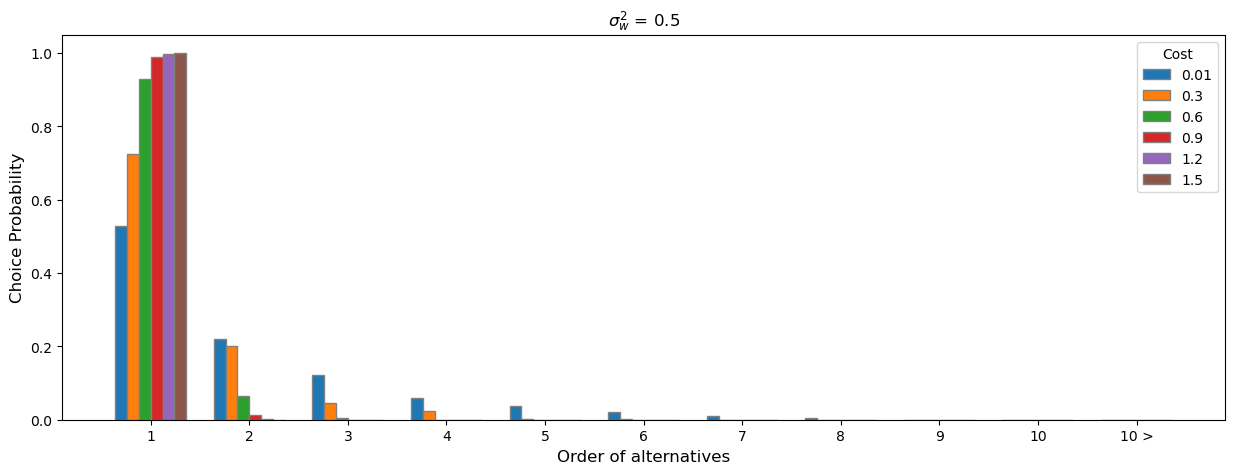

In [9]:
# set width of bar
barWidth = 0.12

fig = plt.subplots(figsize =(15, 5))

# set height of bar
bars = []
for cost in costs:
    with open('Data/collections_w0.5v0.25c' + str(cost) + '.pkl', "rb") as f:
        data = pickle.load(f)
    c_p = dict(Counter([i[0] for i in data]))
    for keys in c_p.keys():
        c_p[keys] = c_p[keys] / 1000.
    other_sum = round(sum(v for k, v in c_p.items() if k > 10), 3)
    c_p10 = np.zeros(10)
    for k, v in c_p.items():
        if k <= 10:
            c_p10[int(k) - 1] = v
    bars.append(np.append(c_p10, [other_sum]))

# Make the plot
for i in range(len(costs)):
    cost = costs[i]
    plt.bar([x + i * barWidth for x in np.arange(len(bars[0]))], bars[i], width = barWidth,
        edgecolor ='grey', label = cost)

# Adding Xticks
plt.xlabel('Order of alternatives', fontsize = 12)
plt.ylabel('Choice Probability', fontsize = 12)
plt.xticks([r + 2.5 * barWidth for r in range(len(bars[0]))], [str(i) for i in range(1,11)] + ['10 >'])
plt.title(r"$\sigma_w^2$ = " + str(0.5))
plt.legend(title = "Cost")
plt.show()

---
Extra code for debug outputs

In [ ]:
from scipy.stats import chisquare

## Code to output choice probablities for Treatment 1, sigma_v = 3
for w_var in w_vars:
    for cost in costs:
        print("w_var =", w_var, ", cost =", cost)
        with open('Data/collections_x' + str(w_var) + 'c' + str(cost) + '.pkl', "rb") as f:
            data = pickle.load(f)
        c_p = dict(Counter([i[0] for i in data]))
        for keys in c_p.keys():
            c_p[keys] = c_p[keys] / 1000.
        c_p = dict(sorted(c_p.items()))
        print("\tChoice Probabilities =", c_p)
        c_p_og = dict()
        for keys in c_p.keys():
            c_p_og[keys] = c_p[keys] * 1000.
        freq = [list(c_p_og.values())[a] if a < len(c_p) else 0 for a in range(10)]
        ## Run Chi-squared against uniform distribution
#         print(chisquare(freq, f_exp=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100])[1] < 0.01)

## Code to output choice probablities for Treatment 1, sigma_w = 3
for v_var in v_vars:
    for cost in costs:
        print("v_var =", v_var, ", cost =", cost)
        with open('Data/collections_v' + str(v_var) + 'c' + str(cost) + '.pkl', "rb") as f:
            data = pickle.load(f)
        c_p = dict(Counter([i[0] for i in data]))
        for keys in c_p.keys():
            c_p[keys] = c_p[keys] / 1000.
        c_p = dict(sorted(c_p.items()))
        print("\tChoice Probabilities =", c_p)
        c_p_og = dict()
        for keys in c_p.keys():
            c_p_og[keys] = c_p[keys] * 1000.
        freq = [list(c_p_og.values())[a] if a < len(c_p) else 0 for a in range(10)]
        
        ## Run Chi-squared against uniform distribution
#         print(chisquare(freq, f_exp=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100])[1] < 0.01)

# Code to output choice probabilities Treatment 2
for w_var in w_vars:
    for ratio in v_vars_ratio:
        for cost in [1.5]:
            print("w_var =", w_var, ", v_var_ratio =", ratio, ", cost =", cost)
            with open('Data/collections_w' + str(w_var) + 'v' + str(float(w_var * ratio)) + 'c' + str(cost) + '.pkl', "rb") as f:
                data = pickle.load(f)
            c_p = dict(Counter([i[0] for i in data]))
            for keys in c_p.keys():
                c_p[keys] = c_p[keys] / 1000.
            c_p = dict(sorted(c_p.items()))
            print("\tChoice Probabilities =", c_p)
            c_p_og = dict()
            for keys in c_p.keys():
                c_p_og[keys] = c_p[keys] * 1000.
            freq = [list(c_p_og.values())[a] if a < len(c_p) else 0 for a in range(10)]
            ## Run Chi-squared against uniform distribution 
#             print(chisquare(freq, f_exp=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100])[1] < 0.01)